<a href="https://colab.research.google.com/github/EderLara/IA-Innovador-Talento-Tech/blob/main/Inteligencia_Artificial_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Guia para la creación, definición, entrenamiento y evaluación de una red neuronal simple para la clasificación de dígitos MNIST utilizando Keras y TensorFlow

In [3]:
import tensorflow as tf                         # La librería base de TensorFlow.
from tensorflow import keras                    # La API de alto nivel para construir y entrenar redes neuronales.
from tensorflow.keras import layers             # layers para definir las capas de la redneuronal
import matplotlib.pyplot as plt                 # La librería para gráficar

In [4]:
""" Cargar el Conjunto de Datos MNIST: """
# Keras proporciona funciones convenientes para cargar conjuntos de datos populares como MNIST.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()         # x_train y y_train son los datos de entrenamiento (imágenes y etiquetas respectivamente). x_test y y_test son los datos de prueba.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
""" Preprocesar los Datos: """
# Normalizar las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train = x_train.astype("float32") / 255.0                       # Los valores de los píxeles en las imágenes MNIST están originalmente en el rango de 0 a 255.
x_test = x_test.astype("float32") / 255.0                         # Normalizarlos a un rango de 0 a 1 ayuda a que el entrenamiento de la red sea más estable y rápido.

# Aplanar las imágenes de 28x28 a un vector de 784 elementos
input_shape = (784,)                                              # Las imágenes MNIST son matrices de 28x28 píxeles. Para alimentar una red neuronal densa (fully connected),
x_train = x_train.reshape(x_train.shape[0], 784)                  # Necesitamos aplanar cada imagen en un vector unidimensional de 784 elementos (28 * 28).
x_test = x_test.reshape(x_test.shape[0], 784)

# Convertir las etiquetas a codificación one-hot
num_classes = 10                                                  # Las etiquetas (los dígitos del 0 al 9) se convierten a una representación "one-hot".
y_train = keras.utils.to_categorical(y_train, num_classes)        # Por ejemplo, el dígito '3' se convierte en el vector [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.].
y_test = keras.utils.to_categorical(y_test, num_classes)          # Esto es necesario para la capa de salida de clasificación con múltiples clases.

In [6]:
""" Definir la Arquitectura de la Red Neuronal: """
# Vamos a crear una red neuronal simple con una capa de entrada, una capa oculta y una capa de salida.
model = keras.Sequential(                                          # El modelo es una secuencia de capas. keras.Sequential: Define un modelo secuencial donde las capas se apilan linealmente.
    [
        layers.Input(shape=input_shape),                           # layers.Input(shape=input_shape): Define la capa de entrada, especificando la forma de los datos de entrada (un vector de 784 elementos).
        layers.Dense(128, activation="relu"),                      # Capa oculta con 128 neuronas y función de activación ReLU
        layers.Dense(num_classes, activation="softmax"),           # Capa de salida con 10 neuronas (una por clase) y función de activación softmax
    ]
)

# Notas:
# layers.Dense(128, activation="relu"): Define una capa densa (fully connected) con 128 neuronas. La función de activación ReLU (Rectified Linear Unit) es común en las capas ocultas.
# layers.Dense(num_classes, activation="softmax"): Define la capa de salida. Tiene num_classes (10) neuronas, una para cada dígito. La función de activación softmax convierte las salidas de la capa en una distribución de probabilidad sobre las 10 clases.


# Mostrar la arquitectura del modelo
model.summary()                     # model.summary(): Muestra un resumen de la arquitectura del modelo, incluyendo el número de capas, la forma de salida de cada capa y el número total de parámetros entrenables.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
""" Compilar y Entrenar el Modelo: """
# Antes de entrenar el modelo, necesitamos configurarlo especificando el optimizador, la función de pérdida y las métricas.

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Notas:
# loss="categorical_crossentropy": La función de pérdida utilizada para la clasificación multiclase con etiquetas codificadas en one-hot.
# optimizer="adam": Un algoritmo de optimización popular que ajusta los pesos de la red durante el entrenamiento para minimizar la función de pérdida.
# metrics=["accuracy"]: La métrica que se utilizará para evaluar el rendimiento del modelo durante el entrenamiento y la prueba. La precisión mide la fracción de las predicciones que son correctas.

In [8]:
""" Entrenar la Red """
# "Ahora, entrenaremos la red utilizando los datos de entrenamiento."

batch_size = 128                            # El número de muestras que se propagan a través de la red en cada paso del entrenamiento.
epochs = 10                                 # El número de veces que se itera sobre el conjunto de datos de entrenamiento.

# Entrenar el modelo
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# validation_split=0.1: Una fracción del conjunto de datos de entrenamiento (10% en este caso)
# se utilizará como un conjunto de validación para evaluar el rendimiento del modelo durante el entrenamiento y evitar el sobreajuste.
# model.fit(): Inicia el proceso de entrenamiento. La función devuelve un objeto history que contiene información sobre el entrenamiento, como la pérdida y la precisión en cada época

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8258 - loss: 0.6319 - val_accuracy: 0.9522 - val_loss: 0.1764
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9434 - loss: 0.1985 - val_accuracy: 0.9642 - val_loss: 0.1327
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9602 - loss: 0.1409 - val_accuracy: 0.9703 - val_loss: 0.1043
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9702 - loss: 0.1055 - val_accuracy: 0.9730 - val_loss: 0.0956
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9756 - loss: 0.0842 - val_accuracy: 0.9752 - val_loss: 0.0880
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9812 - loss: 0.0672 - val_accuracy: 0.9745 - val_loss: 0.0810
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9847 - loss: 0.0562 - val_accuracy: 0.9763 - val_loss: 0.0829
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9856 - loss: 0.0510 - val_accuracy: 0.

In [9]:
""" Evaluar el Modelo: """
# Después del entrenamiento, evaluaremos el rendimiento del modelo en el conjunto de datos de prueba.

score = model.evaluate(x_test, y_test, verbose=0)                   # model.evaluate: Evalúa la pérdida y las métricas del modelo en el conjunto de datos de prueba. / verbose=0:Silencia la salida detallada.

# Imprimimos la perdida y precisión:
print("Pérdida en el conjunto de prueba:", score[0])
print("Precisión en el conjunto de prueba:", score[1])

Pérdida en el conjunto de prueba: 0.07336451858282089
Precisión en el conjunto de prueba: 0.9781000018119812


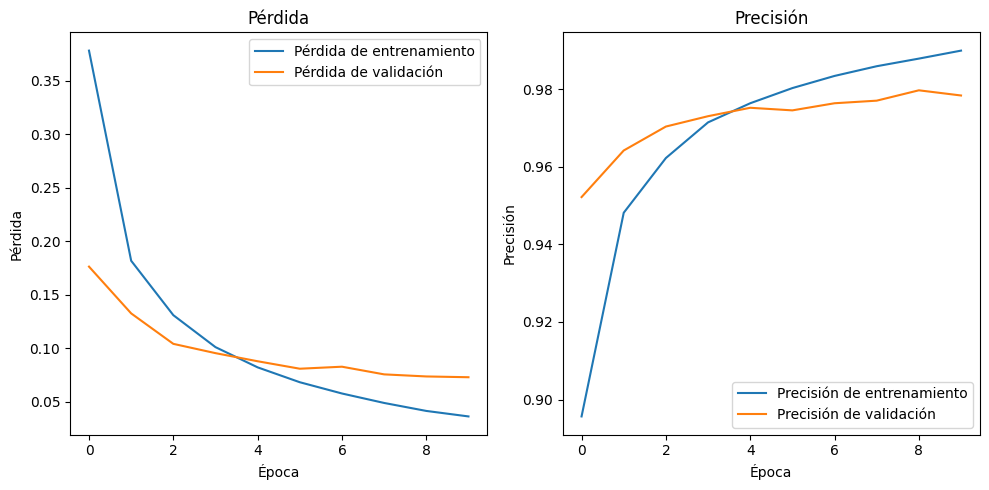

In [10]:
""" Visualizar el Entrenamiento (Opcional): """
# Podemos visualizar la pérdida y la precisión durante el entrenamiento para observar cómo aprende el modelo:

# Visualizar la pérdida del entrenamiento y la validación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Visualizar la precisión del entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()